$$\tau \dot{x}(t) = Mx(t) + I(t)$$

$$\dot{x}(t) = \frac{x(t + dt) - x(t)}{dt}$$

$$x(t+dt) = \biggl(1 + \frac{dt}{\tau} M \biggr) x(t) + \frac{dt}{\tau} I(t)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

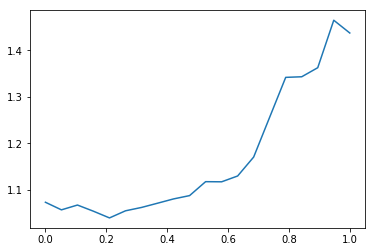

In [7]:
dt = 0.1     # ms, timestep
tau = 10.0    # ms, timescale
nNeuron = 20
eta = dt / tau

def make_trans_matrix(alphaExcInh):
    nExc = nNeuron // 2
    nInh = nNeuron // 2
    
    M = np.zeros((nNeuron, nNeuron))
    M[:nExc, :nExc] = alphaExcInh * np.random.uniform(0, 10, (nExc, nExc))
    M[nExc:, :nExc] = (1 - alphaExcInh) * np.random.uniform(0, 10, (nInh, nExc))
    M[:nExc, nExc:] = -(1 - alphaExcInh) * np.random.uniform(0, 10, (nExc, nInh))
    #M[nExc:, nExc:] = -(1 - alphaExcInh) * np.random.uniform(0, 100, (nInh, nInh))
    Meff = eta * M
    np.fill_diagonal(Meff, (1 - eta)*np.ones(nNeuron))
    return Meff

alphaLst = np.linspace(0, 1, 20)
maxEig = [np.max(np.real(np.linalg.eig(make_trans_matrix(a))[0])) for a in alphaLst]

plt.figure()
plt.plot(alphaLst, maxEig)
plt.show()

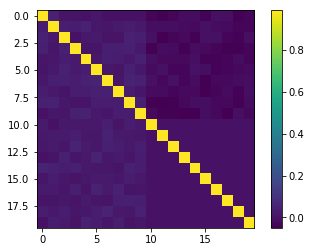

In [8]:
plt.figure()
plt.imshow(make_trans_matrix(0.5))
plt.colorbar()
plt.show()

In [15]:
def simulate(M, T, haveNeg=True):
    nT = int(T/dt)
    
    x = np.zeros((nT, nNeuron))
    x[0] = np.random.uniform(0, 1, nNeuron)
    
    for i in range(nT-1):
        I = 0.1 * np.random.uniform(0, 1, nNeuron) #+ 0.1 * np.sin(2 * np.pi * i * dt / (2 * tau))
        x[i+1] = M.dot(x[i]) + eta * I
        if not haveNeg:
            x[i+1][x[i+1] < 0] = 0
        

    times = np.arange(nT) * dt
    xMag = np.linalg.norm(x, axis=1)

    plt.figure()
    plt.plot(times, xMag)
    plt.show()
    
    return times, x

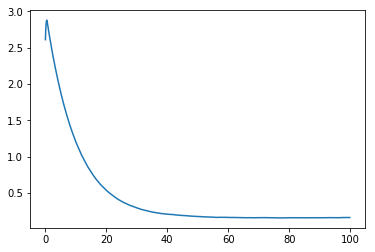

In [19]:
Meff = make_trans_matrix(0.38)
times, x = simulate(Meff, 100, haveNeg=False)

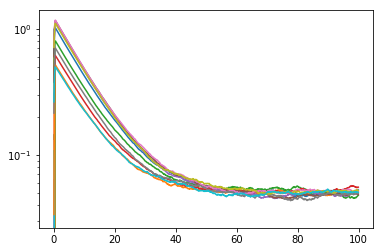

In [20]:
plt.figure()
for i in range(nNeuron):
    plt.semilogy(times, x[:, i])
plt.show()

In [21]:
np.mean(x, axis=0)

array([2.87821341e-03, 1.20035432e-03, 2.94478704e-03, 2.84859738e-03,
       6.35428951e-05, 2.61378830e-03, 4.87549588e-04, 3.75867513e-04,
       1.89666609e-03, 1.73387164e-04, 1.50726504e-01, 9.70515796e-02,
       1.29107417e-01, 1.08962499e-01, 1.59920354e-01, 1.64531545e-01,
       1.67039115e-01, 1.15285059e-01, 1.60656701e-01, 9.65361131e-02])